# Udacity Data Analyst Nanodegree
# Exploratory Data Analysis: What influences baseball salaries?

## Introduction


[Sean Lahman's](http://www.seanlahman.com/baseball-archive/statistics/) baseball data data set contains complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. The data set provides a variety of opportunities for statistically driven investigations.

This study aims to identify the variables and/or factors that have the biggest influence on major league baseball player salaries. The study is divided separately for pitchers and batters, due to the inherent differences and roles between the two player types.

## Report Sections

This report starts with a data wrangling phase involving data importing, merging and cleaning. Once prepped, the data is analyzed in the exploration phase and conclusions and suggestions for future studies are presented in the final section. 



----------general notebook formatting examples


**Question 1**: Write at least two questions you think could be answered by data.

**Answer**:

1) What is/are the busiest times of the day for bike rentals?

2) What locations have the highest demand for bike rentals?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options. You will learn more about Markdown later in the Nanodegree Program. Hit **Shift** + **Enter** or **Shift** + **Return**.


# Data Wrangling

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import general_utils as Ugen
import matplotlib.pyplot as plt
import pandas as pd
import math
from pandas.tools.plotting import scatter_matrix
import numpy as np

In [4]:
#GET DATA
pitcher_df=pd.read_csv('baseballdata/Pitching.csv') 
batter_df=pd.read_csv('baseballdata/Batting.csv') 
salary_df=pd.read_csv('baseballdata/Salaries.csv') 

In [7]:
#EXPLORE DATA
batter_df.head() #print first 5 entries

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13,8,1,4,0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19,3,1,2,5,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27,1,1,0,2,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16,6,2,2,1,NaN,NaN,NaN,NaN,NaN


In [8]:
#EXPLORE DATA
salary_df.head() #print first 5 entries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


**Thoughts**: Right away, we can see that the salary data starts in 1985, whereas the batter data starts in 1871. Let's find out what range of years is covered in each data set.

In [12]:
##FIND WHAT YEARS ARE COVERED
batter_years=list(batter_df['yearID'].values)
salary_years=list(salary_df['yearID'].values)

print ('batter_df covers %d-%d' % (min(batter_years),max(batter_years)))
print ('salary_df covers %d-%d' % (min(salary_years),max(salary_years)))


batter_df covers 1871-2015
salary_df covers 1985-2015


In [14]:
#Clean up pitchers data table to eliminate years without salary data
pitcher_df=pitcher_df[pitcher_df['yearID']>=1985]
batter_df=batter_df[batter_df['yearID']>=1985]

print (len(pitcher_df.index))
print (len(batter_df.index))
print (len(salary_df.index))

19159
39095
25575


**Thoughts**: Looks like we are still limited by availability of salary data. Rather than filtering down the datasets until they match, it makes more sense to perform an inner join between the two datasets.

In [212]:
##JOIN DATASETS
df=batter_df.merge(salary_df,'outer',['yearID','playerID','teamID'])

df.head()

#still players missing salary data

,playerID,yearID,stint,teamID,lgID_x,W,L,G,GS,CG,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,lgID_y,salary
0,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,1,1,366,43,44,NaN,NaN,NaN,NaN,NaN
1,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,0,0,109,0,18,NaN,NaN,NaN,NaN,NaN
2,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,3,0,370,26,35,NaN,NaN,NaN,AL,170000
3,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,3,0,246,21,27,NaN,NaN,NaN,AL,147500
4,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,2,2,507,1,49,NaN,NaN,NaN,NaN,NaN


In [213]:
##REMOVE PLAYERS WITH MISSING SALARY DATA
df=df[df['salary']>0]

df.head() #Nans successfully removed

,playerID,yearID,stint,teamID,lgID_x,W,L,G,GS,CG,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,lgID_y,salary
2,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,3,0,370,26,35,NaN,NaN,NaN,AL,170000
3,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,3,0,246,21,27,NaN,NaN,NaN,AL,147500
5,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,6,0,1090,0,105,NaN,NaN,NaN,AL,875000
7,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1,1,135,13,22,NaN,NaN,NaN,NL,750000
8,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,3,1,318,19,41,NaN,NaN,NaN,NL,250500


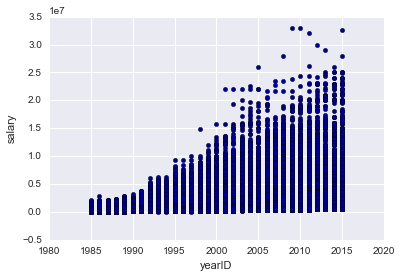

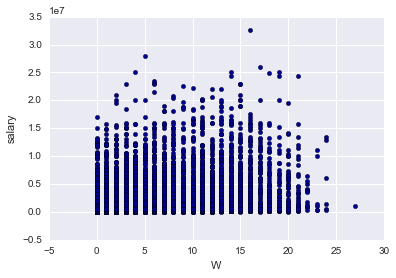

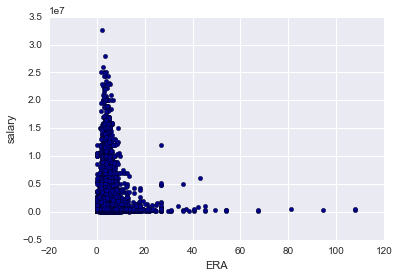

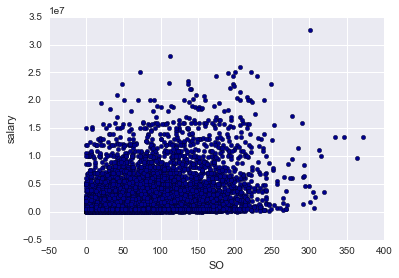

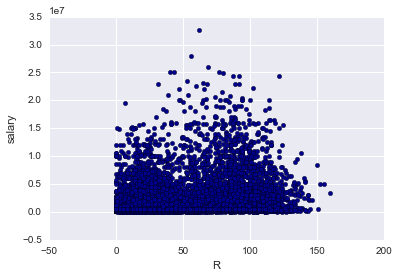

In [214]:
##SAMPLE PLOTTING

plot_vars=['yearID','W','ERA','SO','R']

for var in plot_vars:
    df.plot(kind='scatter', x=var, y='salary',color='DarkBlue')

##salaries increase year by year, so need to investigate each year individually

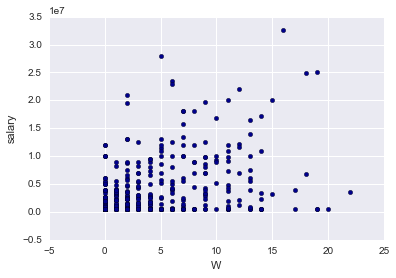

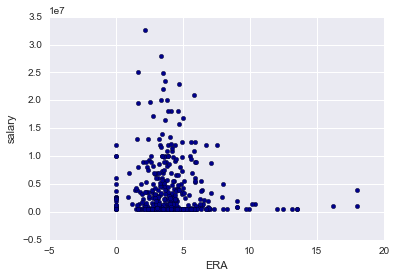

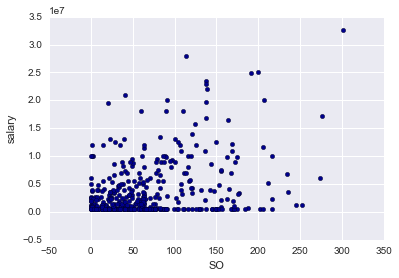

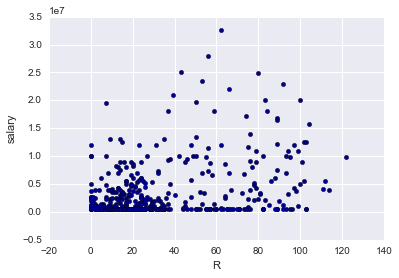

In [215]:
##SAMPLE PLOTTING

plot_vars=['W','ERA','SO','R']

for var in plot_vars:
    df[df['yearID']==2015].plot(kind='scatter', x=var, y='salary',color='DarkBlue')


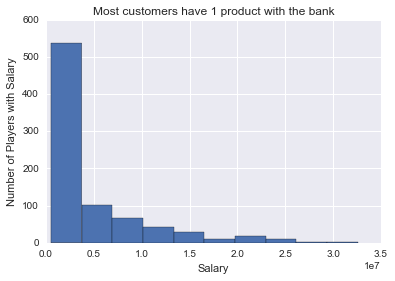

In [216]:
df[df['yearID']==2015].salary.hist(bins=10)
plt.xlabel('Salary')
plt.ylabel('Number of Players with Salary')
plt.title('Most customers have 1 product with the bank')
plt.show()

In [217]:
df['logsalary']=df.apply(lambda df: math.log10(df['salary']),axis=1)

df.head()

,playerID,yearID,stint,teamID,lgID_x,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,lgID_y,salary,logsalary
2,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,0,370,26,35,NaN,NaN,NaN,AL,170000,5.230449
3,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0,246,21,27,NaN,NaN,NaN,AL,147500,5.168792
5,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,0,1090,0,105,NaN,NaN,NaN,AL,875000,5.942008
7,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1,135,13,22,NaN,NaN,NaN,NL,750000,5.875061
8,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,1,318,19,41,NaN,NaN,NaN,NL,250500,5.398808


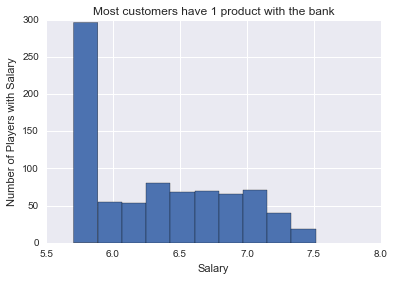

In [218]:
df[df['yearID']==2015].logsalary.hist(bins=10)
plt.xlabel('Salary')
plt.ylabel('Number of Players with Salary')
plt.title('Most customers have 1 product with the bank')
plt.show()

##more even distribution (still slightly skewed)

In [219]:
##BUILD ADDITIONAL FEATURES

normalize_features=['BB','HR','H','SO','SHO','W','L','SV','GS','R']

for feature in normalize_features:
    df[feature+'_N']=df.apply(lambda df: df[feature]/df['G'],axis=1)

print (df.isnull().sum())

df.head()

playerID         0
yearID           0
stint        14043
teamID           0
lgID_x       14043
W            14043
L            14043
G            14043
GS           14043
CG           14043
SHO          14043
SV           14043
IPouts       14043
H            14043
ER           14043
HR           14043
BB           14043
SO           14043
BAOpp        14504
ERA          14048
IBB          14043
WP           14043
HBP          14043
BK           14043
BFP          14043
GF           14043
R            14043
SH           19359
SF           19359
GIDP         25190
lgID_y           0
salary           0
logsalary        0
BB_N         14043
HR_N         14043
H_N          14043
SO_N         14043
SHO_N        14043
W_N          14043
L_N          14043
SV_N         14043
GS_N         14043
R_N          14043
dtype: int64


,playerID,yearID,stint,teamID,lgID_x,W,L,G,GS,CG,...,BB_N,HR_N,H_N,SO_N,SHO_N,W_N,L_N,SV_N,GS_N,R_N
2,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,0.704918,0.114754,1.409836,0.688525,0.000000,0.114754,0.032787,0.163934,0.000000,0.573770
3,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0.425926,0.055556,0.833333,0.722222,0.000000,0.074074,0.055556,0.018519,0.000000,0.500000
5,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,1.861111,0.777778,7.444444,3.944444,0.027778,0.472222,0.277778,0.000000,1.000000,2.916667
7,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,0.739130,0.130435,1.391304,0.434783,0.000000,0.043478,0.173913,0.086957,0.043478,0.956522
8,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,0.456140,0.087719,1.368421,0.877193,0.000000,0.052632,0.052632,0.052632,0.000000,0.719298


In [220]:
print (df.shape)
df=df.drop(['SH','SF','GIDP','BAOpp'],axis=1)
print (df.shape)
df=df.dropna(axis=0)
print (df.shape)

(25576, 43)
(25576, 39)
(11528, 39)


In [221]:
##SET THE CURRENT YEAR OF STUDY

year=2015 

In [222]:
# Make a dataframe with the selected features and the target variable
all_vars=['W','L','G','GS','CG','SHO','SV','IPouts','H','ER','HR',
                 'BB','SO','ERA','IBB','WP','HBP','BK','BFP','GF','R']

feature_vars=[var+'_N' for var in normalize_features]

X_sel = df[df['yearID']==year] #select subset of rows
X_sel = X_sel[list(feature_vars+['logsalary'])] #select subset of columns

In [223]:
cor_mat = X_sel.corr()

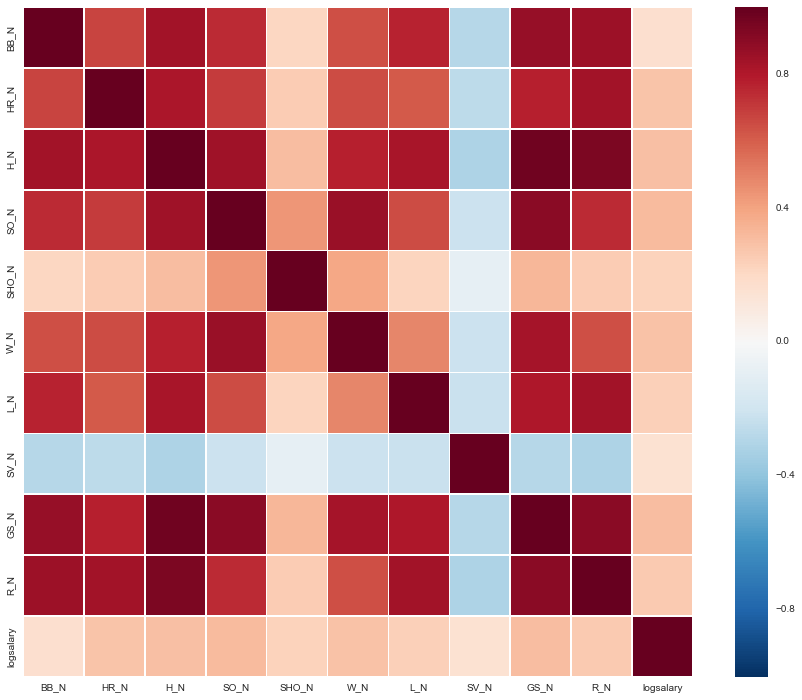

In [224]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

##COMMENTS:

In [225]:
#pearsonr func only takes one x var at a time

# print (X_sel.columns.values)

X_sel=X_sel.drop('logsalary', axis=1) #redefine X_sel so it doesn't include logsalary
Y=df[df['yearID']==year].logsalary ##THIS IS GETTING UGLY WITH THE YEAR VARIABLE!!!!....


In [228]:
from scipy import stats
corr_dict={}


all_var_df=df[df['yearID']==year]
all_var_df=all_var_df[all_vars + feature_vars]

# for feature in X_sel.keys():
for feature in all_var_df.keys():
    corr_dict[feature]={}
#     corr_dict[feature]['pearsonr']=stats.pearsonr(X_sel[feature].values,Y.values)[0]
#     corr_dict[feature]['pval']=stats.pearsonr(X_sel[feature].values,Y.values)[1]
    corr_dict[feature]['pearsonr']=stats.pearsonr(all_var_df[feature].values,Y.values)[0]
    corr_dict[feature]['pval']=stats.pearsonr(all_var_df[feature].values,Y.values)[1]

corr_dict

##potentially add covariance matrix to eliminate correlation


##as seen with some variables (i.e. Wins (W)), normalizing helps create more predictive feature

{'BB': {'pearsonr': 0.18059770932659747, 'pval': 0.00021315486915645627},
 'BB_N': {'pearsonr': 0.17175913402459139, 'pval': 0.00043341117234783129},
 'BFP': {'pearsonr': 0.28498827210806488, 'pval': 3.2523820270705933e-09},
 'BK': {'pearsonr': 0.12314470365427312, 'pval': 0.011947687818485764},
 'CG': {'pearsonr': 0.25080256358964975, 'pval': 2.182660678282811e-07},
 'ER': {'pearsonr': 0.269997308831181, 'pval': 2.2119148680587468e-08},
 'ERA': {'pearsonr': -0.11731826845183588, 'pval': 0.016670077354841994},
 'G': {'pearsonr': -0.067469136138747943, 'pval': 0.16958745300396363},
 'GF': {'pearsonr': -0.00074575644448496531, 'pval': 0.98790075120498244},
 'GS': {'pearsonr': 0.30698194346289359, 'pval': 1.5793460401507856e-10},
 'GS_N': {'pearsonr': 0.30478131141312248, 'pval': 2.1626088140543345e-10},
 'H': {'pearsonr': 0.2829493243601709, 'pval': 4.2499993554916577e-09},
 'HBP': {'pearsonr': 0.21248023822454734, 'pval': 1.2383098777654123e-05},
 'HR': {'pearsonr': 0.28912553975496125,

In [250]:
##Variables with top 5 correlation
keys=list(corr_dict.keys())
vals=[corr_dict[key]['pearsonr'] for key in keys]


ranked_dict={}

i=1
while i<6: #definitely a better way of doing this..
    m = max(vals)
    m_int=[i for i, j in enumerate(vals) if j == m][0]
    if keys[m_int].split('_')[0] not in ranked_dict.keys():#don't want to include normalized and 
        ranked_dict[keys[m_int]]={}                      #un-normalized feature (essentially double counting) 
        ranked_dict[keys[m_int]]['rank']=i
        ranked_dict[keys[m_int]]['r']=m
        i+=1
    del vals[m_int]
    del keys[m_int]
    

ranked_dict


#games started
#hits
#strikeouts
#wins
#outs pitched

{'GS': {'r': 0.30698194346289359, 'rank': 2},
 'H_N': {'r': 0.30352174504329893, 'rank': 3},
 'IPouts': {'r': 0.29064667412486539, 'rank': 5},
 'SO_N': {'r': 0.31358913840347241, 'rank': 1},
 'W_N': {'r': 0.29500047553843028, 'rank': 4}}

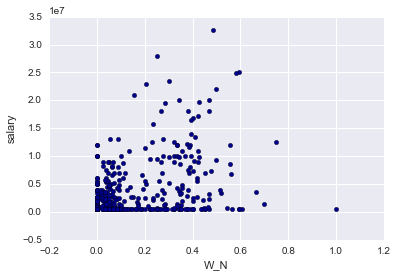

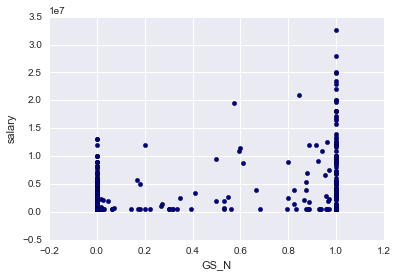

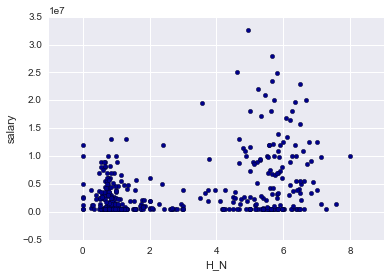

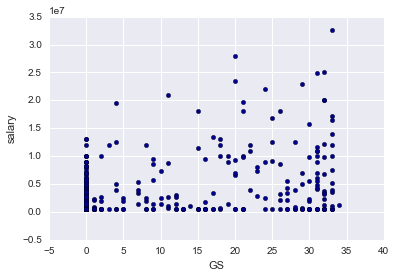

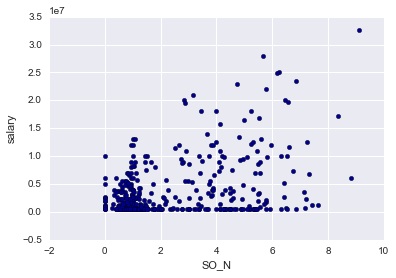

In [241]:
##ADDITIONAL PLOTTING

plot_vars=[feature for feature in ranked_dict.keys()]

for var in plot_vars:
    df[df['yearID']==year].plot(kind='scatter', x=var, y='salary',color='DarkBlue')

                                                Notes to Ian

- Add some different types of graphs based on course material.

- Review course content -- see what other material you need in here...

- Eventually try plotting previous years performance against this years salary? Or google average contract length - maybe try average of previous 3 years performance??

- Plot salary vs position?
 
- other data from Master's table

- Put this notebook back into a single python script...
- loop through each year and see how the most predictive variables change over time..




2016-09-21

- plot team payrolls over time
- include conclusions section with opportunities for future work (i.e. including agents, contract extension, resigning etc.)